In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv(r"C:\Users\Zana\Desktop\portfolio_projects\3. Marketing Campaign Regression Analysis\cleaned_marketing.csv")
print(df.head())

   id      c_date    campaign_name    category  campaign_id  impressions  \
0   1  2021-02-01   facebook_tier1      social       349043       148263   
1   2  2021-02-01   facebOOK_tier2      social       348934       220688   
2   3  2021-02-01       google_hot      search     89459845        22850   
3   4  2021-02-01      google_wide      search       127823       147038   
4   5  2021-02-01  youtube_blogger  influencer        10934       225800   

   mark_spent  clicks  leads  orders  revenue  
0     7307.37    1210     13       1   4981.0  
1    16300.20    1640     48       3  14962.0  
2     5221.60     457      9       1   7981.0  
3     6037.00    1196     24       1   2114.0  
4    29962.20    2258     49      10  84490.0  


# 3. Multiple Linear Regression

## Objective
The model is extended by adding additional predictors, including `impressions`, `clicks`, and `leads`, to improve the accuracy of predicting revenue. This approach provides a better understanding of how multiple marketing factors influence revenue.

## Key Predictors:
- **Impressions**: Number of times the ad was displayed.
- **Clicks**: Number of times users clicked on the ad.
- **Leads**: Number of potential customers generated.

## Expected Outcome:
Including these variables will likely result in a more accurate and comprehensive model, offering deeper insights into the relationship between various marketing efforts and revenue generation.

In [2]:
# Include additional predictors: 'impressions', 'clicks', and 'leads'
X = df[['mark_spent', 'impressions', 'clicks', 'leads']]  # Independent variables
y = df['revenue']  # Dependent variable (revenue)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared, RMSE, and MAE
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output the evaluation metrics
print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R-squared: 0.6027850969370833
RMSE: 216439.42317133193
MAE: 89750.8820959516


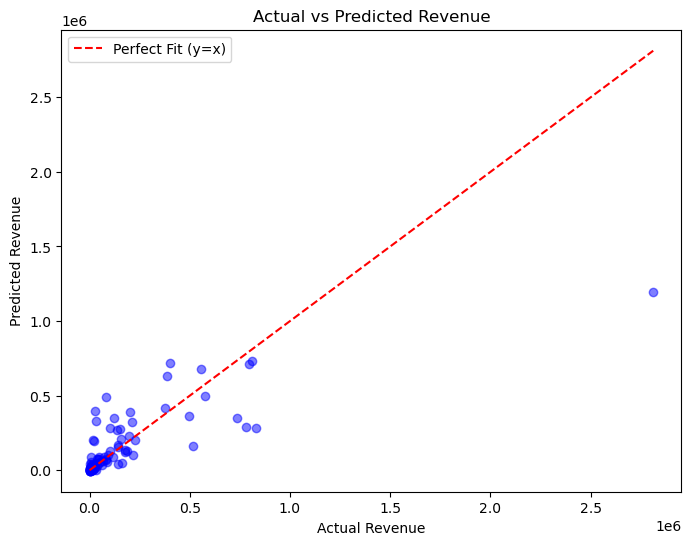

In [3]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Revenue
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Fit (y=x)')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()
plt.show()

### Insights on **Actual vs Predicted Revenue** Plot (Multiple Linear Regression)

- **Scatter Plot**:
  - The **blue points** represent the predicted revenue versus actual revenue values for the test set.
  - The **red dashed line** represents the **perfect fit**, where the predicted revenue equals the actual revenue (y = x). Any point on this line would indicate a perfect prediction.

- **Key Insights**:
  - The model's predictions, indicated by the blue points, tend to be clustered closer to the origin (lower revenue values), with some points lying closer to the red dashed line (indicating better predictions).
  - The **further from the line**, the greater the deviation between actual and predicted revenue, indicating a prediction error. Some of the data points, especially those on the higher end of the actual revenue spectrum, show noticeable deviations, suggesting that the model struggles more with accurately predicting high revenue values.
  

# Model Evaluation Summary

## Simple Linear Regression:
- **R-squared**: 0.576 – The model explains 57.6% of the variance in revenue using `mark_spent`.
- **RMSE**: 223,586.20 – The model’s predictions deviate from actual revenue by an average of 223,586.
- **MAE**: 92,960.24 – The average absolute error between predicted and actual revenue is 92,960.

## Multiple Linear Regression:
- **R-squared**: 0.603 – The model explains 60.3% of the variance in revenue using `mark_spent`, `impressions`, `clicks`, and `leads`.
- **RMSE**: 216,439.42 – The model’s predictions deviate from actual revenue by an average of 216,439.
- **MAE**: 89,750.88 – The average absolute error between predicted and actual revenue is 89,750.

## Conclusion:
The multiple linear regression model offers a slight improvement over the simple linear regression model. By including more variables (`impressions`, `clicks`, and `leads`), the model better explains the variance in revenue
